The first step is to install the necessary libraries. In this case, we need `yfinance` to download financial data. We use the `!pip install` command to install the library directly in the notebook environment.

In [6]:
!pip install yfinance

Here, we import the required libraries:

- `seaborn` and `matplotlib.pyplot` for data visualization.
- `numpy` for numerical operations.
- `pandas` for data manipulation and analysis.
- `yfinance` for fetching financial data.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

This cell downloads historical stock data for Apple (AAPL) using the `yfinance` library.

- `yf.download("AAPL", start="2020-01-01", end="2025-01-01")` downloads data for the ticker "AAPL" from January 1, 2020, to January 1, 2025.
- The downloaded data is stored in a pandas DataFrame called `data`.
- `print(data.head())` displays the first five rows of the DataFrame to show a preview of the data, including the 'Close' price, 'High', 'Low', 'Open', and 'Volume' for each date. The data is indexed by date and includes a multi-level column index with 'Price' and 'Ticker'. The warning `FutureWarning: YF.download() has changed argument auto_adjust default to True` indicates a change in a future version of the `yfinance` library regarding how stock splits and dividends are handled; in this case, `auto_adjust` is being automatically set to `True`.

In [20]:
data = yf.download("AAPL",start="2020-01-01",end="2025-01-01")
print(data.head())

/tmp/ipython-input-20-3385316413.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL",start="2020-01-01",end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487862  72.526549  70.783263  71.034724  118387200
2020-01-07  72.146950  72.753831  71.926922  72.497537  108872000
2020-01-08  73.307526  73.609760  71.849548  71.849548  132079200


In this cell, we calculate the 30-day Simple Moving Average (SMA) and plot the closing price of AAPL along with the SMA.

- `data["SMA30"] = data['Close'].rolling(window=30).mean()` calculates the rolling mean of the 'Close' price over a window of 30 days and stores it in a new column called 'SMA30'. The `.rolling()` method provides rolling windows over the data, and `.mean()` calculates the mean within each window.
- `plt.figure(figsize=(12,6))` creates a new figure for the plot with a specified size.
- `plt.plot(data['Close'], label='AAPL Close')` plots the 'Close' price data with a label.
- `plt.plot(data['SMA30'], label='30-Day SMA', linestyle='--')` plots the calculated SMA data with a label and a dashed line style.
- `plt.title("AAPL Price vs 30-Day SMA")`, `plt.xlabel("Date")`, and `plt.ylabel("Price")` set the title and axis labels for the plot.
- `plt.legend()` displays the legend for the plot, showing what each line represents.
- `plt.grid(True)` adds a grid to the plot for better readability.
- `plt.show()` displays the generated plot.

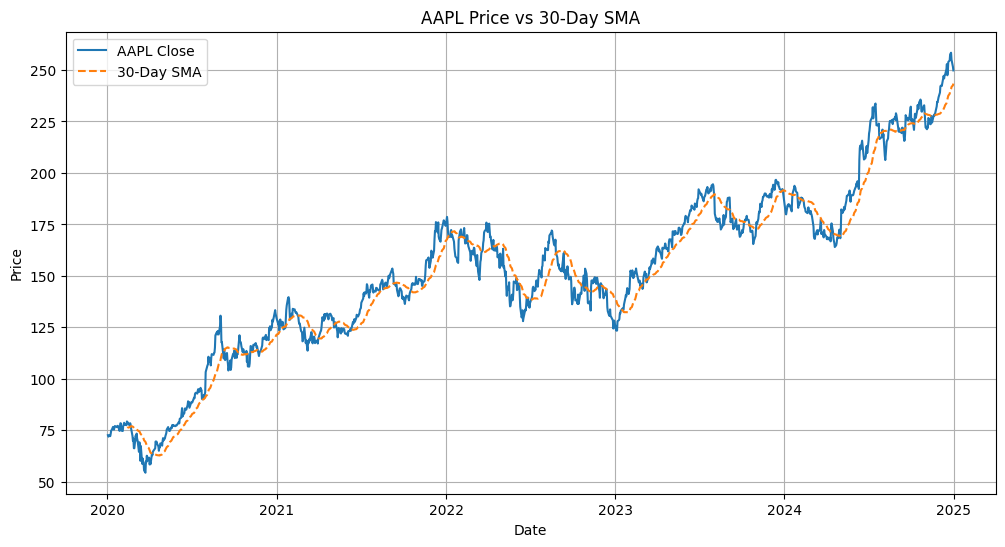

In [21]:
data["SMA30"] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='AAPL Close')
plt.plot(data['SMA30'], label='30-Day SMA', linestyle='--')
plt.title("AAPL Price vs 30-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# **DAILY RETURNS**

This markdown cell serves as a section header to indicate that the following code will focus on calculating and analyzing the daily returns of the stock.

In [22]:
data['Returns'] = data['Close'].pct_change()
data['Returns'].head()

,Returns
Date,
2020-01-02,NaN
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086


In [23]:
data['LogReturns'] = np.log(data['Close']/data['Close'].shift(1))
data['LogReturns'].head()

,LogReturns
Date,
2020-01-02,NaN
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958


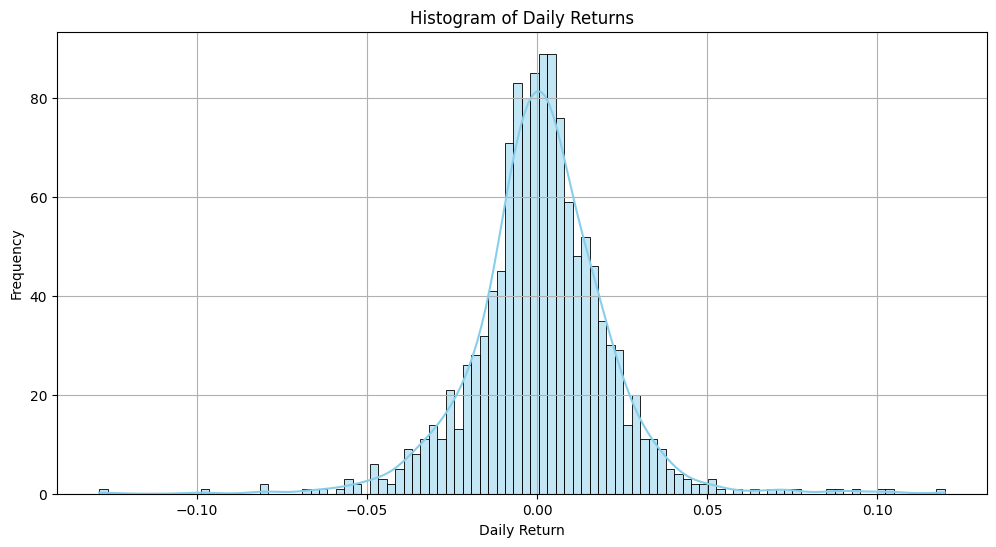

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data['Returns'],bins=100,color='skyblue',kde=True)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [27]:
data['Volatility'] = data['Returns'].rolling(window=21).std() * np.sqrt(252)
data['Volatility'].head(100)

,Volatility
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2020-05-19,0.281228
2020-05-20,0.249986
2020-05-21,0.244457


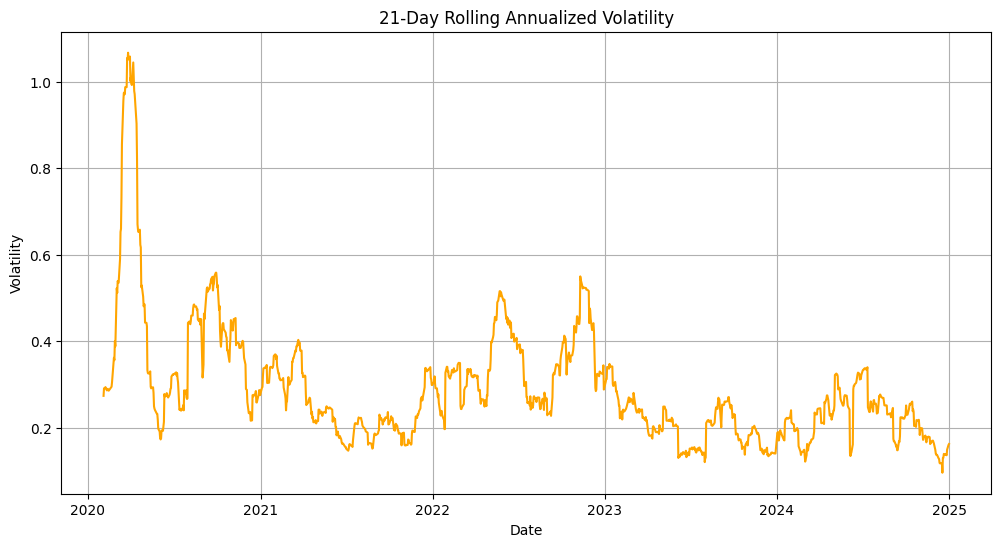

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data['Volatility'],color='orange')
plt.title('21-Day Rolling Annualized Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.grid(True)
plt.show()

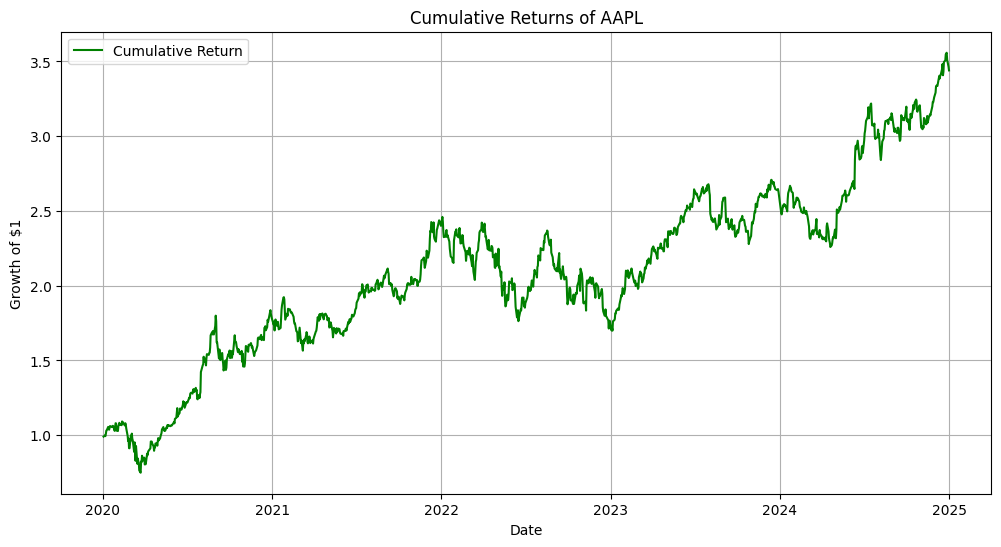

In [30]:
data['Cumulative'] = (1+data['Returns']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative'],color='green',label='Cumulative Return')
plt.title("Cumulative Returns of AAPL")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()

In [31]:
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()
sharpe_ratio = mean_return/std_return
sharpe_ratio

np.float64(0.05923684084913378)